<center>
    <img src="http://www.relations-publiques.pro/wp-content/uploads/2015/10/logo-Project.png" width="300" alt="projeqtor logo"  />
</center>

# Analyse descriptive & prédictive




 <h2>Contenu</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#">Setup librairies</a></li>
    <li><a href="#">Importer les données</a></li>
    <li><a href="#">Préparation des données </a></li>
     <li><a href="#">Etude de correlation </a></li>
    <li><a href="#">Analyse descriptive statistique</a></li>
     <li><a href="#">Analyse données externes - Segmentation Clientéle</a></li>
       <li><a href="#">Analyse prédictive données internes</a></li>
    
</ol>

</div>
 
<hr>

<h3>Quels sont les variables qui affectent la durée du projet et son dépassement et sa facturation ?</h3> 

## 1. Setup librairies

<p>Importation des librairies : </p>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
import sqlite3
from sqlite3 import OperationalError
import psycopg2
from pandas import DataFrame
import pandas_profiling as pp
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
import pandas_profiling as pp
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler # i will use Min Max Scaler 
from sklearn.model_selection import learning_curve

<p>Connexion PostgreSQL : </p>

In [12]:
import psycopg2
conn = psycopg2.connect(host='localhost',port='5432',database='projeqtor', user='postgres', password='1234')

In [13]:
colors = ["teal","pink",'#9b9c9a','#DA70D6'] 

## 2.Importer les données 

<p>Les données sont importées directement de la base de donnée sur PostgreSQL . </p>
Chargement de la table "fact_project" dans un dataframe : 

In [14]:
cursor = conn.cursor()
cursor.execute("""SELECT * FROM fact_project""")
query_results = cursor.fetchall()
df_fact = DataFrame (query_results,columns=['id','idProject','Phase','Resource','Client','Assignment','CreationDate','Bill','Sector','Project_duration','Delay_Assignment','Delay_Total','NbProject','NbPhases'])
df_fact.head(50)

,id,idProject,Phase,Resource,Client,Assignment,CreationDate,Bill,Sector,Project_duration,Delay_Assignment,Delay_Total,NbProject,NbPhases
0,1,1,39,12,13,143,20180219,1,2,22,0,0,1,1
1,2,1,40,12,13,143,20180219,1,2,22,0,0,1,2
2,3,1,41,12,13,143,20180219,1,2,22,0,0,1,3
3,4,1,42,12,13,143,20180219,1,2,22,0,0,1,4
4,5,1,43,12,13,143,20180219,1,2,22,0,0,1,5
5,6,1,44,12,13,143,20180219,1,2,22,0,0,1,6
6,7,1,45,12,13,143,20180219,1,2,22,0,0,1,7
7,8,1,46,12,13,143,20180219,1,2,22,0,0,1,8
8,9,2,1,18,15,677,20180219,2,1,4,1,1,2,1
9,10,2,2,18,15,677,20180219,2,1,4,1,2,2,2


Chargement de la table "dim_bill" dans un dataframe : 

In [15]:
cursor.execute("""SELECT * FROM dim_bill""")
query_results2 = cursor.fetchall()
df_bill = DataFrame (query_results2,columns=['ID_BILL','id','billingType','paymentDone','paymentDate','paymentAmount','paymentDueDate','paymentsCount','sendDate'])
df_bill.head()

,ID_BILL,id,billingType,paymentDone,paymentDate,paymentAmount,paymentDueDate,paymentsCount,sendDate
0,1,1,4,0,2008-05-28,1.23,2008-10-23,0,2007-03-20
1,2,2,2,0,2007-01-04,1.23,2007-05-07,0,2007-04-01
2,3,3,3,0,2008-04-14,1.23,2007-05-18,0,2008-02-08
3,4,4,4,0,2008-07-26,1.23,2007-05-23,0,2007-03-16
4,5,5,1,1,2008-10-14,1.23,2008-10-02,0,2008-05-18


Chargement de la table "dim_resource" dans un dataframe : 

In [16]:
cursor.execute("""SELECT * FROM dim_resource""")
query_results3 = cursor.fetchall()
df_resource = DataFrame (query_results3,columns=['ID_Resource','id','name','Profile','Role','capacity','Team'])
df_resource.head()

,ID_Resource,id,name,Profile,Role,capacity,Team
0,1,1,Resource 1,profileAdministrator,None,1.00,None
1,2,2,Resource 2,profileGuest,None,1.00,None
2,3,3,Resource 3,profileProjectLeader,None,1.00,None
3,4,4,Resource 4,profileAdministrator,Manager,1.00,Abacus Team
4,5,5,Resource 5,profileAdministrator,None,1.00,None


## 3. Préparation des données

In [17]:
df_fact.dtypes

id                  int64
idProject           int64
Phase               int64
Resource            int64
Client              int64
Assignment          int64
CreationDate        int64
Bill                int64
Sector              int64
Project_duration    int64
Delay_Assignment    int64
Delay_Total         int64
NbProject           int64
NbPhases            int64
dtype: object

In [18]:
deleted_columns=['id']
df_fact.drop(deleted_columns,axis=1,inplace=True)
df_fact = df_fact.astype({"idProject": object,"Phase":object,"Resource":object,"Client":object,"Assignment":object,"CreationDate":object,"Bill":object,"Sector":object})

In [19]:
df_fact.dtypes

idProject           object
Phase               object
Resource            object
Client              object
Assignment          object
CreationDate        object
Bill                object
Sector              object
Project_duration     int64
Delay_Assignment     int64
Delay_Total          int64
NbProject            int64
NbPhases             int64
dtype: object

In [20]:
df_fact.isnull().sum()

idProject           0
Phase               0
Resource            0
Client              0
Assignment          0
CreationDate        0
Bill                0
Sector              0
Project_duration    0
Delay_Assignment    0
Delay_Total         0
NbProject           0
NbPhases            0
dtype: int64

<AxesSubplot:>

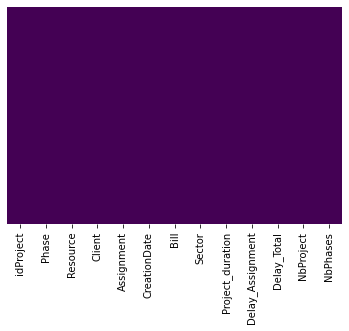

In [21]:
#verification des valeurs manquantes
sns.heatmap(df_fact.isnull(),yticklabels=False, cbar=False,cmap='viridis',color=colors)

In [22]:
print(df_fact.shape)

(1708, 13)


In [23]:
# Nettoyage des donnees
# si existe des lignes repetes les supprimer
df_fact.duplicated().sum()

0

In [24]:
df_fact.describe(include="object")

,idProject,Phase,Resource,Client,Assignment,CreationDate,Bill,Sector
count,1708,1708,1708,1708,1708,1708,1708,1708
unique,67,324,46,49,287,42,67,4
top,56,161,5,44,1967,20180219,56,4
freq,144,18,179,222,17,246,144,473


In [25]:
df_fact.describe()

,Project_duration,Delay_Assignment,Delay_Total,NbProject,NbPhases
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,11.954918,2.852459,73.824941,35.801522,29.405738
std,9.413732,5.279356,105.534216,18.369566,29.027933
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.000000,0.000000,0.000000,24.000000,8.000000
50%,9.000000,0.000000,20.000000,35.000000,20.000000
75%,18.000000,4.000000,109.000000,49.000000,39.000000
max,36.000000,32.000000,493.000000,67.000000,144.000000


In [26]:
profile = pp.ProfileReport(df_fact,vars={'num':{'low_categorical_threshold': 67} }, title="Projeqtor Descriptive Analysis ",explorative=True) 
#profile.to_file("output.html")
profile

## 4. Etude des correlations

### Categorical variables Analysis - boxplot

<AxesSubplot:xlabel='Sector', ylabel='Project_duration'>

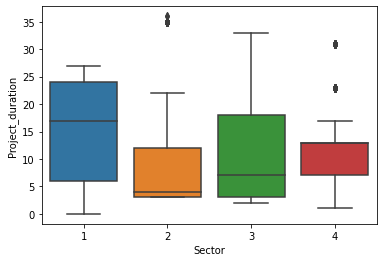

In [27]:
sns.boxplot(x="Sector", y="Project_duration", data=df_fact)

La distribution de la durée de projet entre les secteurs sont différents et distinct ce qui nous aidera à voir l'influence du secteur sur la durée du projet .

<AxesSubplot:xlabel='Sector', ylabel='Delay_Assignment'>

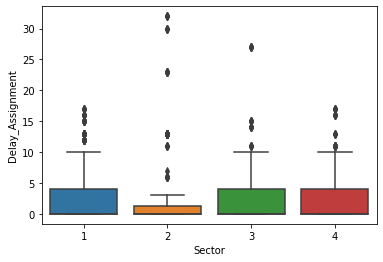

In [28]:
sns.boxplot(x="Sector", y="Delay_Assignment", data=df_fact)

La distribution de la durée de projet entre les secteurs sont similaires  donc la durée du dépassement d'une activité ne peut pas être reliée au secteur .

<h3>Chi-Square</h3>

<b>P-value</b>: 

<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [29]:
df = [df_fact['idProject'],df_fact['Sector']]
stat, p, dof, expected = chi2_contingency(df)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    


p value is 7.988505105373746e-195
Dependent (reject H0)


In [30]:
df = [df_fact['idProject'],df_fact['Resource']]
stat, p, dof, expected = chi2_contingency(df)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    

p value is 0.0
Dependent (reject H0)


In [31]:
df = [df_fact['idProject'],df_fact['Bill']]
stat, p, dof, expected = chi2_contingency(df)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


## 5.Analyse descriptive statistique

In [32]:
df_fact['Phase'].value_counts().to_frame()

,Phase
161,18
263,18
264,18
163,18
162,18
...,...
184,1
39,1
133,1
132,1


In [33]:
df_fact['Sector'].value_counts().to_frame()

,Sector
4,473
1,440
3,423
2,372


In [34]:
df_grp = df_fact[['idProject','NbPhases']]
df_grp = df_grp.groupby(['idProject'],as_index=False).count()
df_grp.head(20)

,idProject,NbPhases
0,1,8
1,2,10
2,4,28
3,5,1
4,6,40
5,7,66
6,8,1
7,10,10
8,11,4
9,13,28


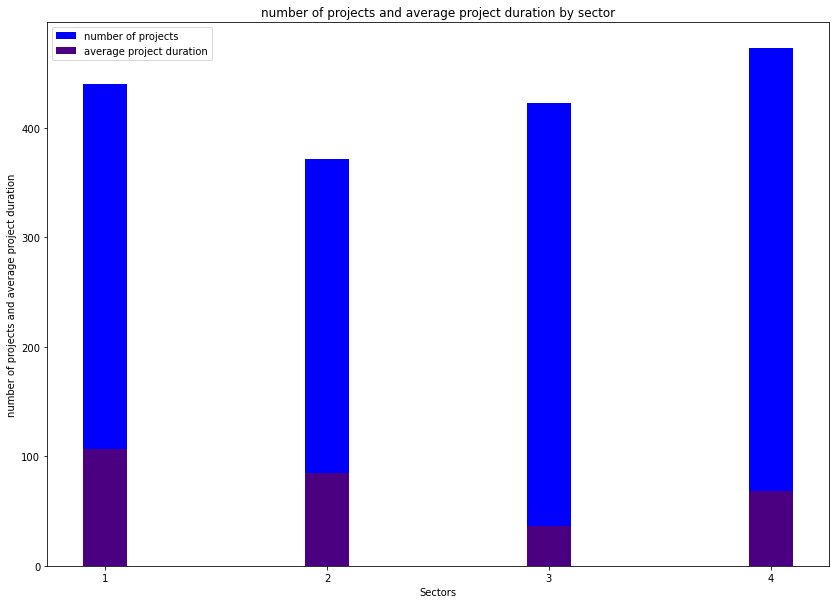

<Figure size 1008x720 with 0 Axes>

In [35]:
# number of projects and average project duration by sector

x=['1','2','3','4']
y1 = df_fact.groupby(['Sector'])['idProject'].count()
y2 = df_fact.groupby(['Sector'])['Delay_Total'].mean()


width = 0.2


# plot data in grouped manner of bar type
plt.figure(figsize=(14,10))
plt.bar(x, y1, width, color='blue')
plt.bar(x, y2, width, color='indigo')
plt.xlabel("Sectors")
plt.ylabel("number of projects and average project duration")
plt.legend(["number of projects", "average project duration"], loc = 'upper left')
plt.title('number of projects and average project duration by sector')
plt.figure(figsize=(14,10))
plt.show()

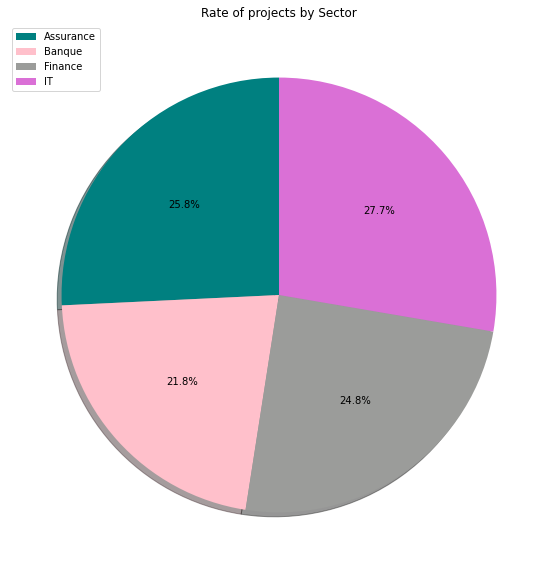

In [36]:
# rate of projects by Sector
y = df_fact.groupby(['Sector'])['idProject'].count()
plt.figure(figsize=(14,10))
plt.pie(y, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(["Assurance", "Banque","Finance", "IT"], loc = 'upper left')
plt.title('Rate of projects by Sector')
plt.show()

<AxesSubplot:title={'center':'Durée de projet (m) par secteur'}, xlabel='Sector'>

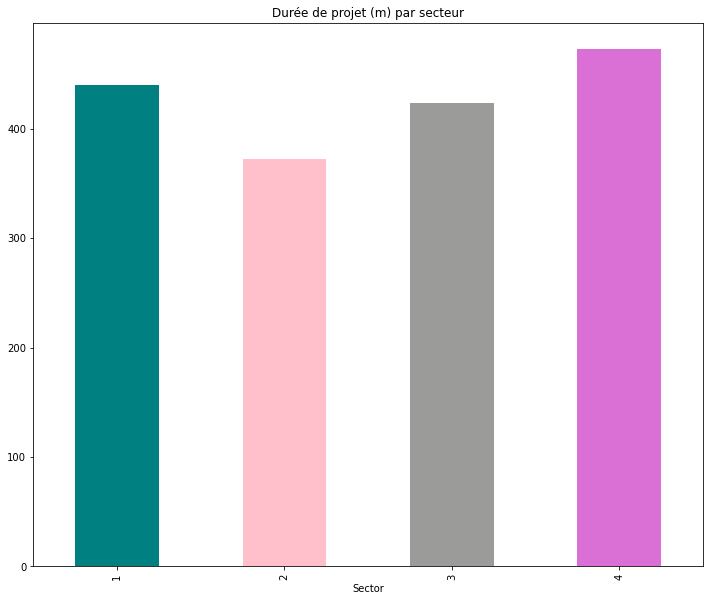

In [37]:
# la duree de projet par secteur
df_project_delayTotal=df_fact.groupby(['Sector'])['Project_duration'].count()
plt.figure(figsize=(12,10))
plt.title("Durée de projet (m) par secteur")
df_project_delayTotal.plot(kind='bar',color=colors)

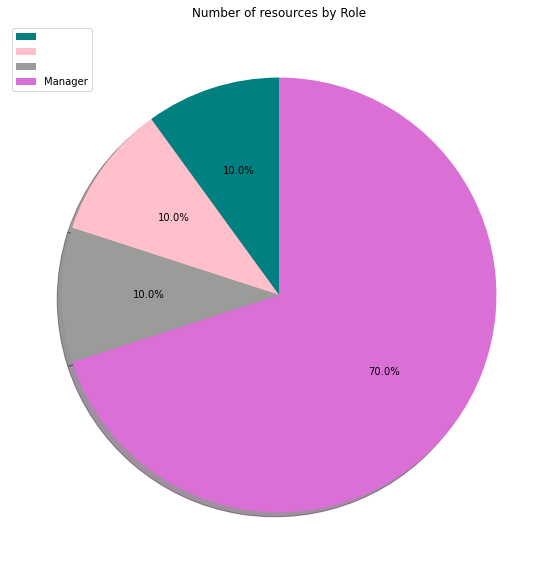

In [38]:
# Number of resources by Role
y = df_resource.groupby(['Role'])['ID_Resource'].count()
plt.figure(figsize=(14,10))

plt.pie(y, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.legend(df_resource['Role'], loc = 'upper left')
plt.title('Number of resources by Role')

plt.show()

## 6.Analyse données externes - Segmentation Clientéle

In [39]:
import pandas as pd
import numpy as np 
#import plotly.express as px
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)
missing_values = ["n/a", "na", "--", " ",""] 
df = pd.read_csv("Telco_customer_churn.csv-1.csv", na_values=missing_values , index_col=0) 

In [40]:
df.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [41]:
df.drop(['Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','CLTV'],axis=1,inplace=True)

In [42]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,Churn Reason
CustomerID,,,,,,,,,,,,,,,
3668-QPYBK,Male,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,Competitor made better offer
9237-HQITU,Female,No,No,Yes,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,Moved
9305-CDSKC,Female,No,No,Yes,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,Moved
7892-POOKP,Female,No,Yes,Yes,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,Moved
0280-XJGEX,Male,No,No,Yes,49,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,Competitor had better devices


In [43]:
df['Sector']=np.random.randint(low=1,high=5,size=7043)

In [44]:
df['IDproject']=np.random.randint(low=1,high=400,size=7043)

In [45]:
df['NBproject']=np.random.randint(low=1,high=20,size=7043)

In [46]:
df.shape

(7043, 18)

In [47]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,Churn Reason,Sector,IDproject,NBproject
CustomerID,,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,Competitor made better offer,3,213,17
9237-HQITU,Female,No,No,Yes,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,Moved,3,284,4
9305-CDSKC,Female,No,No,Yes,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,Moved,4,371,1
7892-POOKP,Female,No,Yes,Yes,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,Moved,2,320,1
0280-XJGEX,Male,No,No,Yes,49,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,Competitor had better devices,1,158,4


In [48]:
df["Payment Method"].nunique()
df["Payment Method"].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [49]:
df["Contract"].nunique()
df["Contract"].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

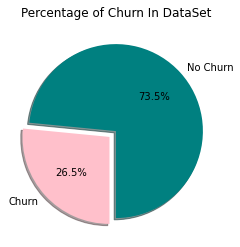

In [50]:
sizes = df['Churn Label'].value_counts(sort = True) 
colors = ["teal","pink"] 
plt.pie(sizes , explode=(0,0.1), labels=['No Churn','Churn'], colors=colors,
       autopct='%1.1f%%', shadow=True , startangle=270,)
plt.title('Percentage of Churn In DataSet') 
plt.show()

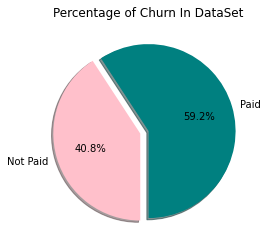

In [51]:
sizes = df['Paperless Billing'].value_counts(sort = True) 
colors = ["teal","pink"] 
plt.pie(sizes , explode=(0,0.1), labels=['Paid','Not Paid'], colors=colors,
       autopct='%1.1f%%', shadow=True , startangle=270,)
plt.title('Percentage of Churn In DataSet') 
plt.show()

In [52]:
title_type = df.groupby('Sector').agg('count')
print(title_type)

        Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
Sector                                                               
1         1721            1721     1721        1721           1721   
2         1790            1790     1790        1790           1790   
3         1774            1774     1774        1774           1774   
4         1758            1758     1758        1758           1758   

        Phone Service  Contract  Paperless Billing  Payment Method  \
Sector                                                               
1                1721      1721               1721            1721   
2                1790      1790               1790            1790   
3                1774      1774               1774            1774   
4                1758      1758               1758            1758   

        Monthly Charges  Total Charges  Churn Label  Churn Value  Churn Score  \
Sector                                                                       

In [53]:
type_labels = title_type.NBproject.sort_values().index

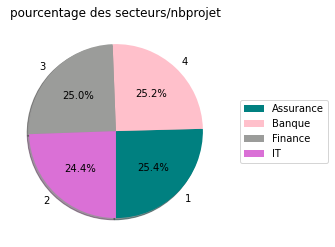

In [54]:

sizes = df['Sector'].value_counts(sort = True) 
colors = ["teal","pink",'#9b9c9a','#DA70D6'] 
plt.pie(sizes , labels=type_labels, colors=colors,
       autopct='%1.1f%%', shadow=True , startangle=270,)
plt.title('pourcentage des secteurs/nbprojet') 
plt.legend(('Assurance','Banque','Finance','IT'),loc="right",bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(rotation='vertical',ha='center left')
plt.show()

In [55]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce')

In [56]:
numerics = df[[
 'Total Charges','Monthly Charges','Tenure Months']]

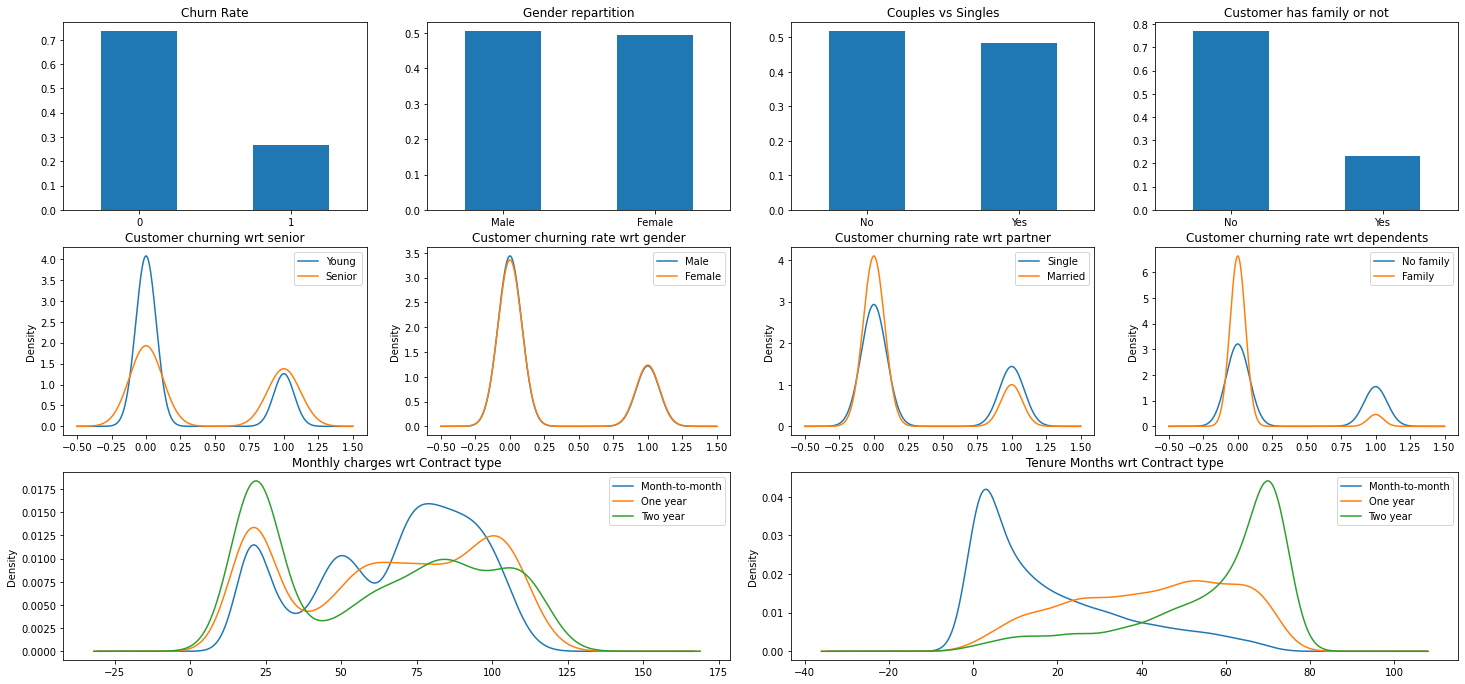

In [57]:
plt.figure(figsize=(25,20))

plt.subplot2grid((5,4),(0,0))
plt.title('Churn Rate')
df['Churn Value'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(0,1))
plt.title('Gender repartition')
df['Gender'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(0,2))
plt.title('Couples vs Singles')
df.Partner.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(0,3))
plt.title('Customer has family or not')
df.Dependents.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,0))
plt.title('Customer churning wrt senior')
df['Churn Value'][df['Senior Citizen'] == "No"].plot(kind='kde')
df['Churn Value'][df['Senior Citizen'] == "Yes"].plot(kind='kde')
plt.legend(('Young','Senior'))
plt.xticks(rotation=0,ha='center')


plt.subplot2grid((5,4),(1,1))
plt.title('Customer churning rate wrt gender')
df['Churn Value'][df['Gender'] == 'Male'].plot(kind='kde')
df['Churn Value'][df['Gender'] == 'Female'].plot(kind='kde')
plt.legend(('Male','Female'))
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,2))
plt.title('Customer churning rate wrt partner')
df['Churn Value'][df['Partner'] == 'No'].plot(kind='kde')
df['Churn Value'][df['Partner'] == 'Yes'].plot(kind='kde')
plt.legend(('Single','Married'))
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,3))
plt.title('Customer churning rate wrt dependents')
df['Churn Value'][df['Dependents'] == 'No'].plot(kind='kde')
df['Churn Value'][df['Dependents'] == 'Yes'].plot(kind='kde')
plt.legend(('No family','Family'))
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(2,0),colspan=2)
plt.title('Monthly charges wrt Contract type')
df['Monthly Charges'][df.Contract == 'Month-to-month'].plot(kind='kde')
df['Monthly Charges'][df.Contract == 'One year'].plot(kind='kde')
df['Monthly Charges'][df.Contract == 'Two year'].plot(kind='kde')
plt.legend(('Month-to-month','One year','Two year'))
plt.xticks(rotation=0,ha='center')



plt.subplot2grid((5,4),(2,2),colspan=2)
plt.title('Tenure Months wrt Contract type')
df['Tenure Months'][df.Contract == 'Month-to-month'].plot(kind='kde')
df['Tenure Months'][df.Contract == 'One year'].plot(kind='kde')
df['Tenure Months'][df.Contract == 'Two year'].plot(kind='kde')
plt.legend(('Month-to-month','One year','Two year'))
plt.xticks(rotation=0,ha='center')


plt.show()

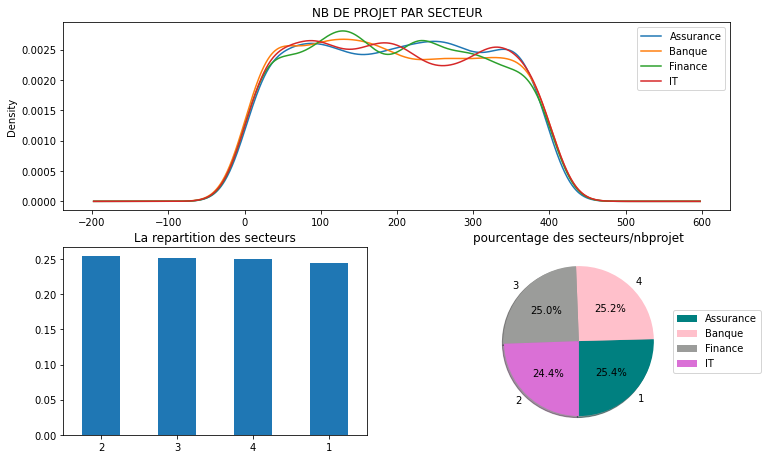

In [58]:
plt.figure(figsize=(25,20))

plt.subplot2grid((5,4),(0,1),colspan=2)
plt.title('NB DE PROJET PAR SECTEUR')
df['IDproject'][df.Sector == 1].plot(kind='kde')
df['IDproject'][df.Sector == 2].plot(kind='kde')
df['IDproject'][df.Sector == 3].plot(kind='kde')
df['IDproject'][df.Sector == 4].plot(kind='kde')
plt.legend(('Assurance','Banque','Finance','IT'))
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,1))
plt.title('La repartition des secteurs')
df['Sector'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,2))
sizes = df['Sector'].value_counts(sort = True) 
colors = ["teal","pink",'#9b9c9a','#DA70D6'] 
plt.pie(sizes , labels=type_labels, colors=colors,
       autopct='%1.1f%%', shadow=True , startangle=270,)
plt.title('pourcentage des secteurs/nbprojet') 
plt.legend(('Assurance','Banque','Finance','IT'),loc="right",bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(rotation='vertical',ha='center left')
plt.show()

plt.show()

In [59]:
import seaborn as sns 

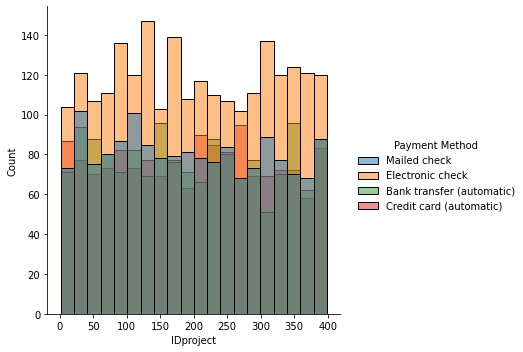

In [60]:
sns.displot(df,x='IDproject', hue='Payment Method',stat="count") 
plt.show()

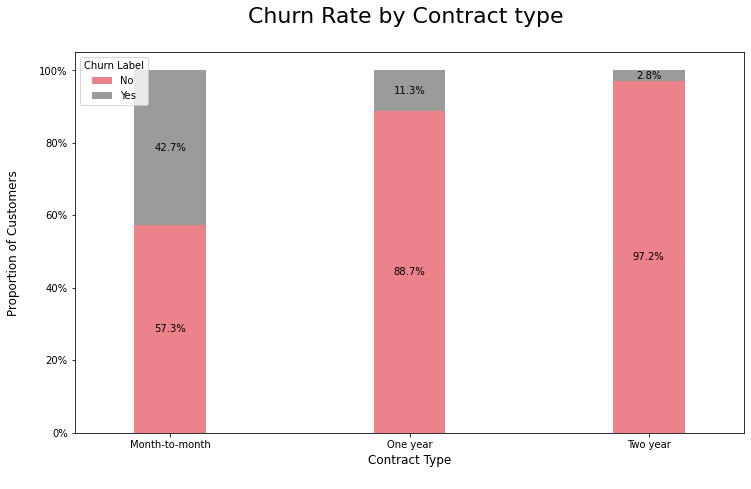

In [61]:
import matplotlib.ticker as mtick
contract_churn =df.groupby(['Contract','Churn Label']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

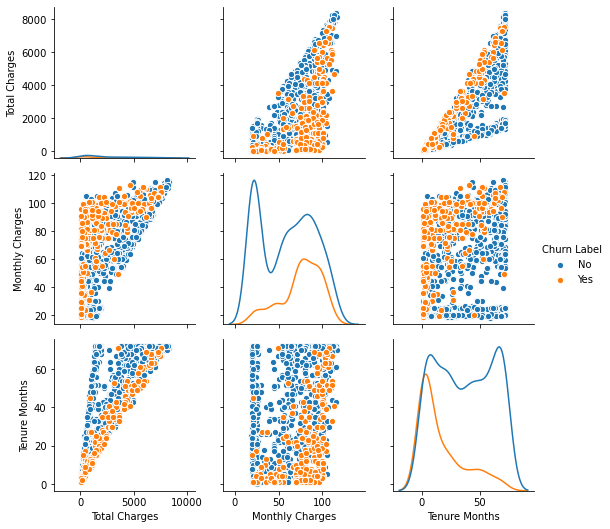

In [62]:
numeric_ds = pd.concat([numerics,df["Churn Label"]],axis=1) 

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn Label")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

In [63]:
df.drop(df[df['Tenure Months'] == 0].index,inplace=True)

In [64]:
cat = []
num = []
for col in df.columns:
    if df[col].dtypes == 'object':
        cat.append(col)
    else:
        num.append(col)

In [65]:
df_cat = df[cat]
df_num = df[num]

In [66]:
df_cat.head()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
CustomerID,,,,,,,,,,
3668-QPYBK,Male,No,No,No,Yes,Month-to-month,Yes,Mailed check,Yes,Competitor made better offer
9237-HQITU,Female,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
9305-CDSKC,Female,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
7892-POOKP,Female,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
0280-XJGEX,Male,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes,Competitor had better devices


In [67]:
df_num.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject
CustomerID,,,,,,,,
3668-QPYBK,2,53.85,108.15,1,86,3,213,17
9237-HQITU,2,70.70,151.65,1,67,3,284,4
9305-CDSKC,8,99.65,820.50,1,86,4,371,1
7892-POOKP,28,104.80,3046.05,1,84,2,320,1
0280-XJGEX,49,103.70,5036.30,1,89,1,158,4


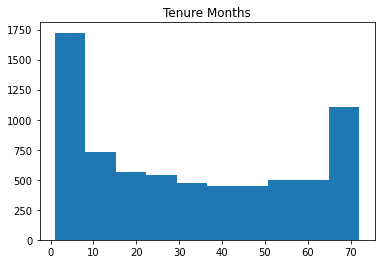

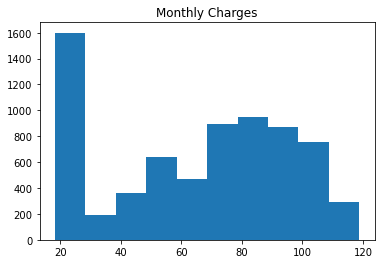

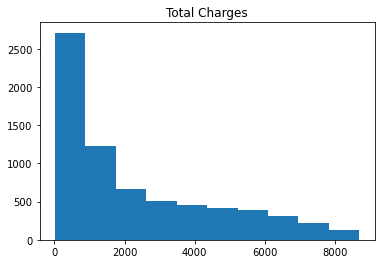

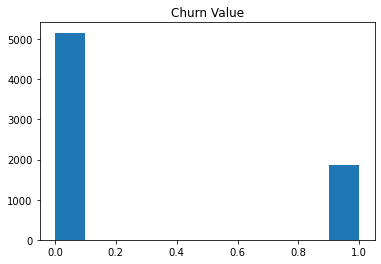

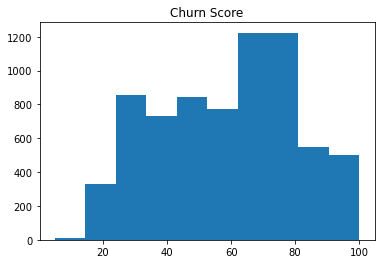

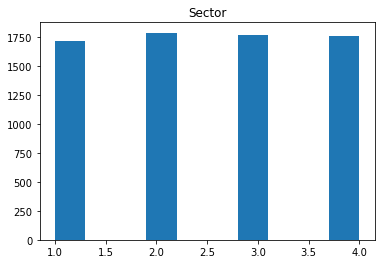

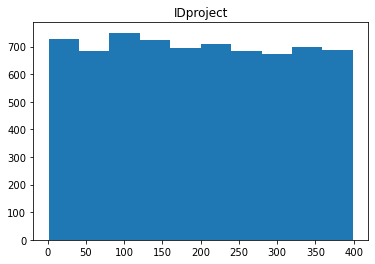

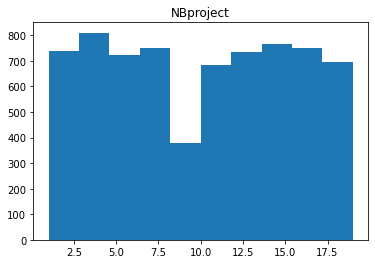

In [68]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                 Tenure Months  Monthly Charges  Total Charges  Churn Value  \
Tenure Months         1.000000         0.246862       0.825880    -0.354049   
Monthly Charges       0.246862         1.000000       0.651065     0.192858   
Total Charges         0.825880         0.651065       1.000000    -0.199484   
Churn Value          -0.354049         0.192858      -0.199484     1.000000   
Churn Score          -0.226379         0.133556      -0.124312     0.664970   
Sector               -0.024333        -0.031182      -0.033229    -0.004125   
IDproject            -0.001900        -0.010150      -0.009247     0.008733   
NBproject             0.016196         0.007035       0.016691    -0.009412   

                 Churn Score    Sector  IDproject  NBproject  
Tenure Months      -0.226379 -0.024333  -0.001900   0.016196  
Monthly Charges     0.133556 -0.031182  -0.010150   0.007035  
Total Charges      -0.124312 -0.033229  -0.009247   0.016691  
Churn Value         0.664970 -0.0041

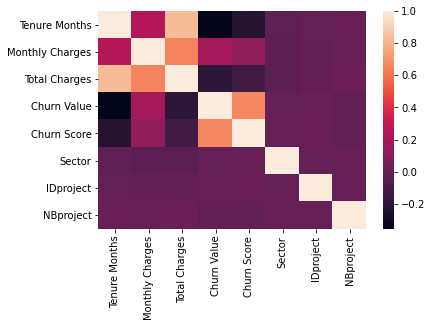

In [69]:
print(df_num.corr())
sns.heatmap(df_num.corr())
plt.show()

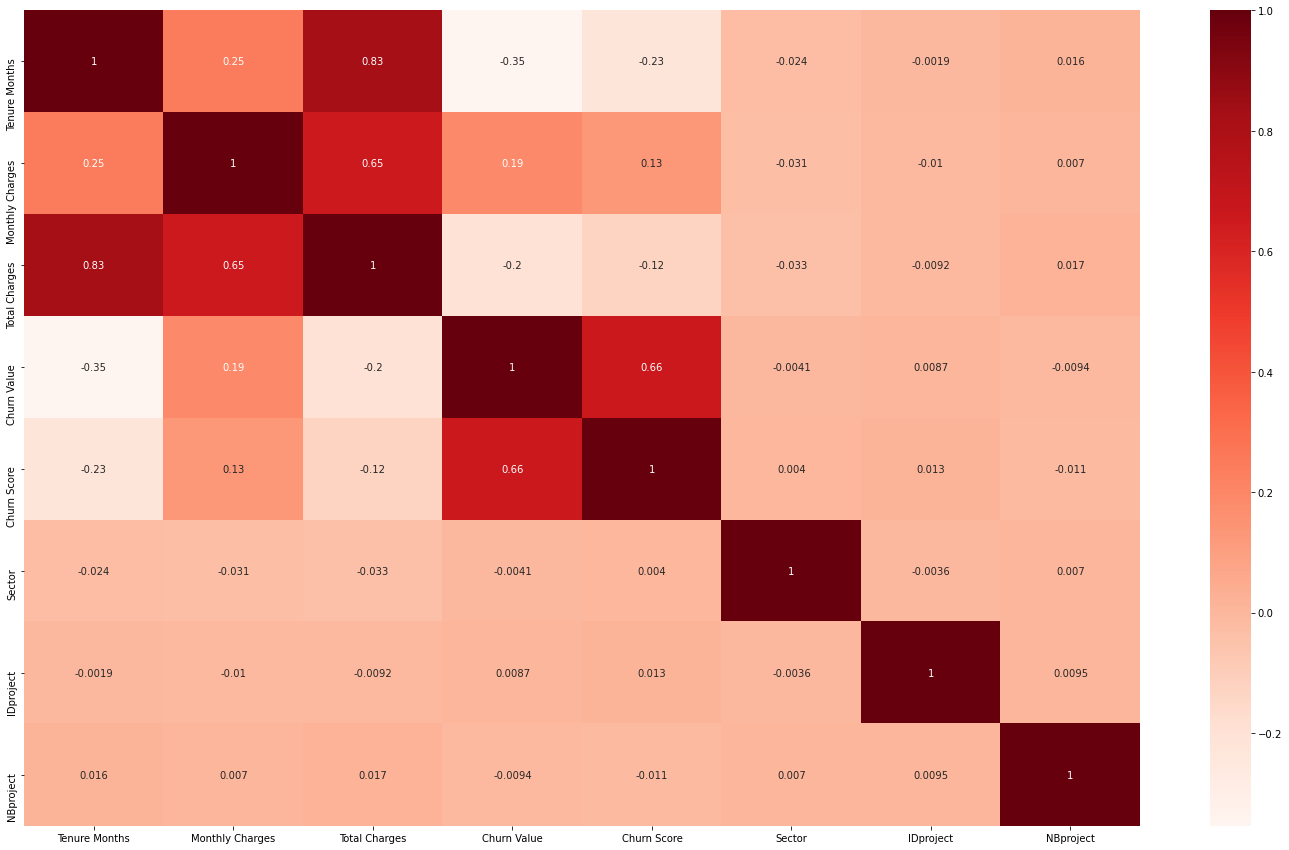

In [70]:
plt.figure(figsize=(25,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

 clustering

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [72]:
df8 = df[num].copy()

### Représentation graphique de la correlation de chaque variable avec la variable cible "Churn"

### Selection des variables

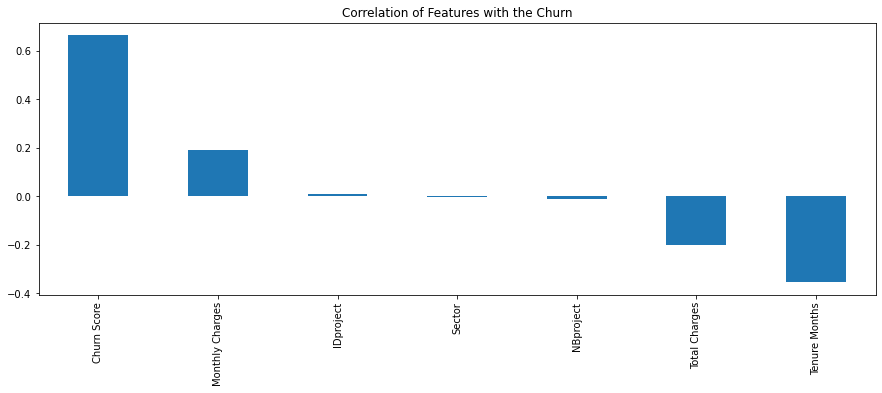

In [73]:
plt.figure(figsize=(15,5))
plt.title("Correlation of Features with the Churn")
col=df8.corr()['Churn Value'].drop(index='Churn Value').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [74]:
mms = MinMaxScaler()
mms.fit(df8)
data_transformed = mms.transform(df8)

In [75]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

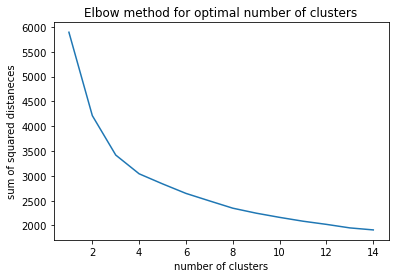

In [76]:
plt.plot(K, sum_of_squared_distances)
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distaneces')
plt.title('Elbow method for optimal number of clusters')
plt.show()

In [77]:
km= KMeans(n_clusters=3)

In [78]:
df9 = df[num].copy()
y_pred = km.fit_predict(df9[['Monthly Charges','Tenure Months']])
df9['cluster'] = y_pred

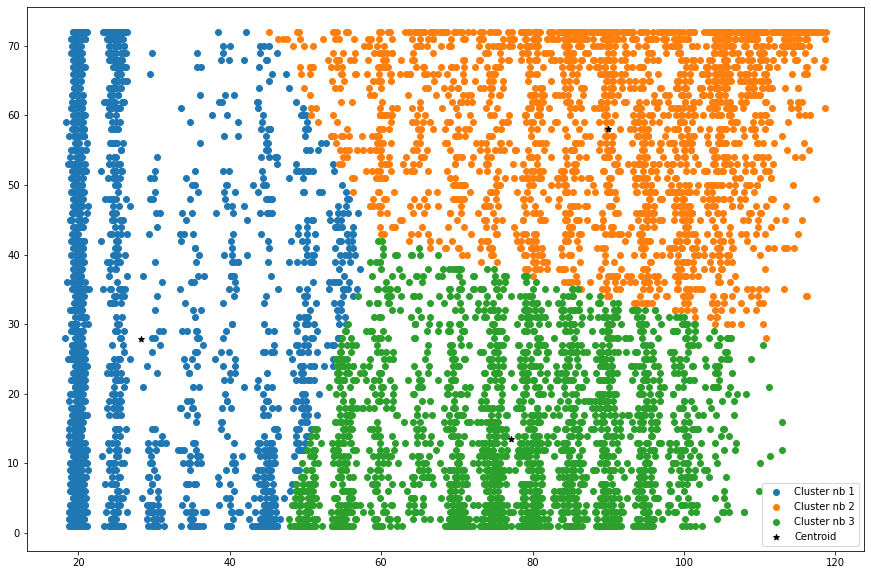

In [79]:
plt.figure(figsize=(15,10))
for i in range(3):
    plt.scatter(df9['Monthly Charges'][df9.cluster==i],df9['Tenure Months'][df9.cluster==i],label='Cluster nb {}'.format(i+1))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='black',label='Centroid')
plt.legend()
plt.show()

In [80]:
df9.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject,cluster
CustomerID,,,,,,,,,
3668-QPYBK,2,53.85,108.15,1,86,3,213,17,2
9237-HQITU,2,70.70,151.65,1,67,3,284,4,2
9305-CDSKC,8,99.65,820.50,1,86,4,371,1,2
7892-POOKP,28,104.80,3046.05,1,84,2,320,1,2
0280-XJGEX,49,103.70,5036.30,1,89,1,158,4,1


In [81]:
cluster_size = df9.groupby(['cluster'], as_index=False).size()

### regroupement et affichage de la taille de chaque cluster

In [82]:
cluster_size

,cluster,size
0,0,2361
1,1,2219
2,2,2452


In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
monthly_wrt_tenure = df9[['Monthly Charges','Tenure Months']][df9['Churn Value']==1]
scaler_mms = MinMaxScaler()
monthly_wrt_tenure_standardized = pd.DataFrame(scaler_mms.fit_transform(monthly_wrt_tenure))
monthly_wrt_tenure_standardized.columns = ['MonthlyCharges','Tenure']

In [85]:
kmeans = km.fit(monthly_wrt_tenure_standardized)
monthly_wrt_tenure_standardized['cluster'] = kmeans.labels_

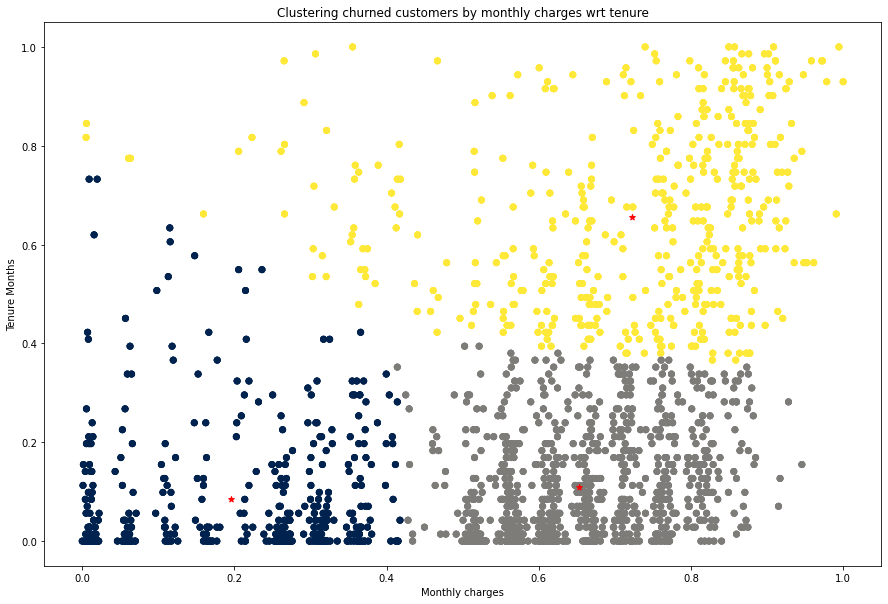

In [86]:
fig, ax = plt.subplots(figsize=(15,10))
for i in range(3):
    plt.scatter(monthly_wrt_tenure_standardized['MonthlyCharges'],monthly_wrt_tenure_standardized['Tenure'],c=monthly_wrt_tenure_standardized['cluster'],cmap='cividis',label='Cluster nb {}'.format(i+1))
plt.title('Clustering churned customers by monthly charges wrt tenure')
plt.xlabel('Monthly charges')
plt.ylabel('Tenure Months')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='red')
plt.show()

In [87]:
churnscore_wrt_monthlycharges = df9[['Churn Score','Monthly Charges']][df9['Churn Value']==1]
churnscore_wrt_monthlycharges_standardized = pd.DataFrame(scaler_mms.fit_transform(churnscore_wrt_monthlycharges))
churnscore_wrt_monthlycharges_standardized.columns = ['Churn Score','Monthly Charges']

In [88]:
kmeans = km.fit(churnscore_wrt_monthlycharges_standardized)
churnscore_wrt_monthlycharges_standardized['cluster'] = kmeans.labels_

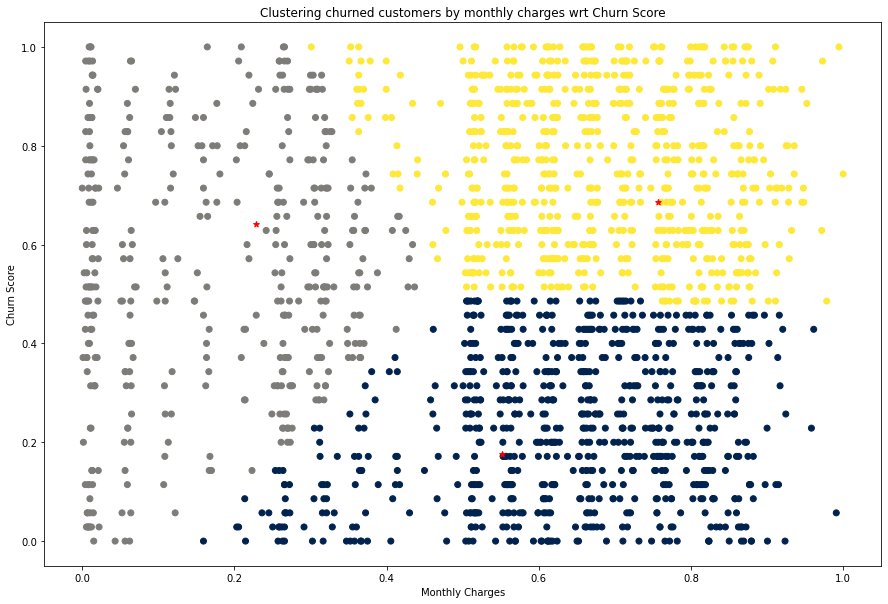

In [89]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(churnscore_wrt_monthlycharges_standardized['Monthly Charges'],churnscore_wrt_monthlycharges_standardized['Churn Score'],c=churnscore_wrt_monthlycharges_standardized['cluster'],cmap='cividis')
plt.title('Clustering churned customers by monthly charges wrt Churn Score')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Score')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='red')
plt.show()

In [90]:
cluster0 = df9[df9['cluster']==0]
cluster1 = df9[df9['cluster']==1]
cluster2 = df9[df9['cluster']==2]

In [91]:
cluster0.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject,cluster
count,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.000000,2361.0
mean,27.946209,28.353918,786.860483,0.149513,54.936044,2.554426,201.249471,9.913172,0.0
std,23.120302,11.244406,723.630834,0.356669,20.554612,1.111812,115.122963,5.448418,0.0
min,1.000000,18.250000,18.800000,0.000000,8.000000,1.000000,1.000000,1.000000,0.0
25%,6.000000,19.950000,153.950000,0.000000,38.000000,2.000000,105.000000,5.000000,0.0
50%,23.000000,22.950000,587.700000,0.000000,56.000000,3.000000,202.000000,10.000000,0.0
75%,47.000000,35.800000,1267.050000,0.000000,71.000000,4.000000,303.000000,15.000000,0.0
max,72.000000,57.150000,3264.450000,1.000000,100.000000,4.000000,399.000000,19.000000,0.0


In [92]:
cluster1.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject,cluster
count,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.000000,2219.0
mean,58.109959,89.958427,5225.521474,0.155926,55.368635,2.464173,196.821992,10.005408,1.0
std,11.664942,16.752899,1480.907995,0.362867,20.532194,1.106156,114.680921,5.523045,0.0
min,28.000000,45.250000,2548.550000,0.000000,5.000000,1.000000,1.000000,1.000000,1.0
25%,49.000000,79.150000,3969.375000,0.000000,38.000000,1.000000,98.000000,5.000000,1.0
50%,60.000000,92.500000,5040.200000,0.000000,56.000000,2.000000,194.000000,10.000000,1.0
75%,69.000000,104.100000,6351.450000,0.000000,71.000000,3.000000,295.000000,15.000000,1.0
max,72.000000,118.750000,8684.800000,1.000000,100.000000,4.000000,399.000000,19.000000,1.0


In [93]:
cluster2.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject,cluster
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.0
mean,13.484095,77.120575,1061.565640,0.477162,65.382953,2.499592,195.858891,9.833605,2.0
std,10.720255,14.711391,873.668965,0.499580,21.753463,1.118627,115.507514,5.477230,0.0
min,1.000000,47.800000,47.950000,0.000000,7.000000,1.000000,1.000000,1.000000,2.0
25%,4.000000,68.887500,259.700000,0.000000,49.000000,2.000000,94.750000,5.000000,2.0
50%,11.000000,76.900000,844.450000,0.000000,70.000000,2.000000,193.000000,10.000000,2.0
75%,22.000000,88.950000,1744.225000,1.000000,81.000000,4.000000,296.000000,15.000000,2.0
max,42.000000,112.950000,3186.650000,1.000000,100.000000,4.000000,399.000000,19.000000,2.0


# KNN

In [94]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [95]:
from sklearn.model_selection import train_test_split
y=df9['Churn Value']
x=df9.drop(['Churn Value'], axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)

In [96]:
robust = RobustScaler()
x_train=robust.fit_transform(x_train)
x_test=robust.transform(x_test)

In [97]:
KNN_model = KNeighborsClassifier(n_neighbors=4, metric='minkowski',algorithm='auto',weights='uniform')
KNN_model.fit(x_train, y_train)
print(KNN_model.score(x_test, y_test))
print(KNN_model.score(x_train, y_train))

0.8792613636363636
0.9220922882427307


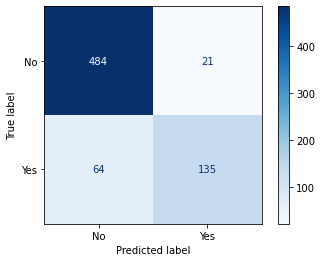

In [98]:
labels=['No','Yes']
plot_confusion_matrix(KNN_model, x_test, y_test,display_labels=labels, cmap=plt.cm.Blues)
plt.show()

In [99]:
knn_pred_prob =KNN_model.predict_proba(x_test)[:,1]
knn_auroc = roc_auc_score(y_test, knn_pred_prob)
print("KNN AUROC: {}".format(knn_auroc))
knn_y_pred = KNN_model.predict(x_test)
print(classification_report(y_test, knn_y_pred,digits=6))

KNN AUROC: 0.941529429324842
              precision    recall  f1-score   support

           0   0.883212  0.958416  0.919278       505
           1   0.865385  0.678392  0.760563       199

    accuracy                       0.879261       704
   macro avg   0.874298  0.818404  0.839921       704
weighted avg   0.878172  0.879261  0.874414       704



# Decision Tree

In [100]:
Tree_model = DecisionTreeClassifier(splitter= 'random',
                            max_depth=12,
                            criterion='gini',
                            random_state=1)
Tree_model.fit(x_train, y_train)
print(Tree_model.score(x_test, y_test))
print(Tree_model.score(x_train, y_train))

0.9133522727272727
0.9508533501896334


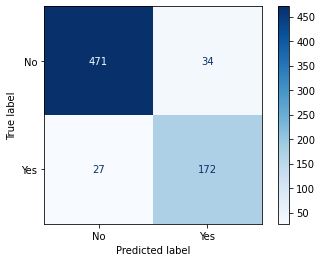

In [101]:
labels=['No','Yes']
plot_confusion_matrix(Tree_model, x_test, y_test,display_labels=labels, cmap=plt.cm.Blues)
plt.show()

In [102]:
dt_pred_prob =Tree_model.predict_proba(x_test)[:,1]
dt_auroc = roc_auc_score(y_test, dt_pred_prob)
print("DecisionTree AUROC: {}".format(dt_auroc))
dt_y_pred = Tree_model.predict(x_test)
print(classification_report(y_test, dt_y_pred,digits=6))

DecisionTree AUROC: 0.9477983979302451
              precision    recall  f1-score   support

           0   0.945783  0.932673  0.939182       505
           1   0.834951  0.864322  0.849383       199

    accuracy                       0.913352       704
   macro avg   0.890367  0.898497  0.894283       704
weighted avg   0.914454  0.913352  0.913799       704



## Regression logistique 

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Y=df9['Churn Value']
X=df9.drop(['Churn Value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[933 111]
 [ 97 266]]


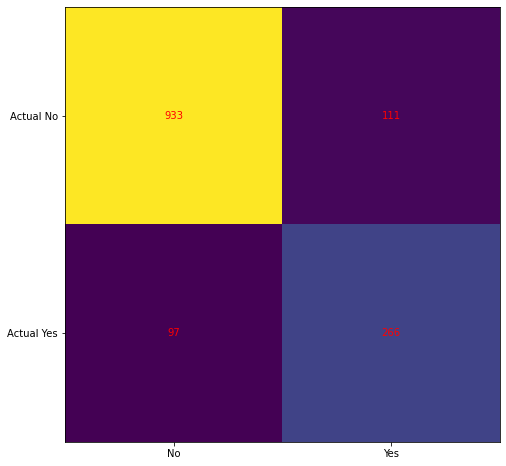

In [164]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('No', 'Yes'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual No', 'Actual Yes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1044
           1       0.71      0.73      0.72       363

    accuracy                           0.85      1407
   macro avg       0.81      0.81      0.81      1407
weighted avg       0.85      0.85      0.85      1407



# 7.Analyse prédictive données internes

In [104]:
df1 = df_fact[['idProject','Project_duration','Delay_Total','NbPhases']]

In [105]:
#df2 = df1.groupby('idProject')
#df2.head()

In [106]:
for i in range(len(df1)-1):
    if(df1['idProject'][i]==df1['idProject'][i+1] and df1['NbPhases'][i] < df1['NbPhases'][i+1]):
        df1.drop(labels=[i],axis=0,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [107]:
df1.groupby('idProject')
df1.head()
#df1['idProject'].value_counts()

,idProject,Project_duration,Delay_Total,NbPhases
7,1,22,0,8
17,2,4,5,10
45,4,31,112,28
46,5,36,0,1
86,6,12,395,40


In [108]:
df1.describe()

,Project_duration,Delay_Total,NbPhases
count,67.000000,67.000000,67.000000
mean,12.940299,72.716418,25.492537
std,9.515347,124.715896,28.920148
min,0.000000,0.000000,1.000000
25%,5.000000,0.000000,6.000000
50%,12.000000,15.000000,20.000000
75%,18.000000,79.500000,35.000000
max,36.000000,493.000000,144.000000


In [109]:
c=df1.corr()[['Delay_Total']]
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

Delay_Total  Project_duration    0.061589
             NbPhases            0.698471
             Delay_Total         1.000000
dtype: float64


<h3> KNN </h3>

In [167]:
y=df1['Delay_Total']
x=df1.drop(['Delay_Total'], axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=23)

In [168]:
robust = RobustScaler()
x_train=robust.fit_transform(x_train)
x_test=robust.transform(x_test)

In [169]:
KNN_model = KNeighborsClassifier(n_neighbors=16, metric='minkowski',algorithm='auto',leaf_size=1,p=2,weights='uniform')
KNN_model.fit(x_train, y_train)
print(KNN_model.score(x_test, y_test))
print(KNN_model.score(x_train, y_train))


0.2857142857142857
0.31666666666666665


from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,30))
n_neighbors = list(range(1,40))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


In [223]:
#labels=['No','Yes']
#plot_confusion_matrix(KNN_model, x_test, y_test,display_labels=labels, cmap=plt.cm.Blues)
#plt.show()


In [ ]:
#knn_pred_prob =KNN_model.predict_proba(x_test)[:,1]
#knn_auroc = roc_auc_score(y_test, knn_pred_prob)
#print("KNN AUROC: {}".format(knn_auroc))
#knn_y_pred = KNN_model.predict(x_test)
#print(classification_report(y_test, knn_y_pred,digits=6))

<h3> Decision Tree </h3>

In [181]:
#tree
y=df_fact['Delay_Total']
x=df_fact.drop(['Delay_Total'], axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=100)

In [182]:
Tree_model = DecisionTreeClassifier(splitter= 'random',
                            max_depth=8,
                            criterion='gini',
                            random_state=2)
Tree_model.fit(x_train, y_train)
print(Tree_model.score(x_test, y_test))
print(Tree_model.score(x_train, y_train))

0.4853801169590643
0.5946649316851008


In [ ]:
#plot_confusion_matrix(Tree_model, x_test, y_test,labels=None, cmap=plt.cm.Blues)
#plt.show()

In [184]:
#dt_pred_prob =Tree_model.predict_proba(x_test)[:,1]
#dt_auroc = roc_auc_score(y_test, dt_pred_prob)
#print("DecisionTree AUROC: {}".format(dt_auroc))
#dt_y_pred = Tree_model.predict(x_test)
#print(classification_report(y_test, dt_y_pred,digits=6))

In [185]:
def idx_max_knn(liste):
  max = liste[0][0]
  param=liste[0][1]
  a = 0  
  for i in range(len(liste)):
    if liste[i][0]>max:
      max =liste [i][0]
      param=liste[i][1]
      a=i
  return [max,a,param]

In [186]:
def idx_max_2x2_knn(liste):
	  
  a = 0
  b =liste[0][1]
  max = liste[0][0]
  param=liste[0][2]
  for i in np.arange(len(liste)):
    if liste[i][0]>max:
      max=liste[i][0]
      b=liste[i][1]
      param=liste[i][2]
      a=i
  return [max,b,a,param]

In [187]:
Features_model1=x.copy()

In [188]:
All_features=['Project_duration','Delay_Assignment','NbPhases']

In [189]:
def All_algo(liste,n):
  X_train, X_test, Y_train, Y_test= train_test_split(liste,y, train_size=n, random_state=10)
  robust = RobustScaler()
  X_train=robust.fit_transform(X_train)
  X_test=robust.transform(X_test)
  knn = KNeighborsClassifier()
  knn_param_grid = {'n_neighbors' : np.arange(1,50),
                  'weights' : ['uniform', 'distance'],
                  'algorithm':['auto','ball_tree','kd_tree','brute'],
                  'metric' : ['euclidean', 'manhattan','minkowski']}
  knn_cv = GridSearchCV(knn, param_grid = knn_param_grid, cv = 5,n_jobs=-1,verbose=2)
  start = timeit.default_timer()
  knn_cv.fit(X_train, Y_train)
  stop = timeit.default_timer()
  print('Time: ', stop - start)
  print("Tuned KNN Parameters (GridSearchCv): {}".format(knn_cv.best_params_))
  print("Best KNN Training Score (GridSearchCv) :{}".format(knn_cv.best_score_))
  dictio=knn_cv.best_params_
  final_model = KNeighborsClassifier(n_neighbors=dictio['n_neighbors'], metric=dictio['metric'],algorithm=dictio['algorithm'],weights=dictio['weights'])
  final_model.fit(X_train, Y_train)
  print(final_model.score(X_test, Y_test))
  print(final_model.score(X_train, Y_train))
  knn_pred_prob =final_model.predict_proba(X_test)[:,1]
  knn_auroc = roc_auc_score(Y_test, knn_pred_prob)
  print("KNN AUROC: {}".format(knn_auroc))
  return[knn_auroc,knn_cv.best_params_]

In [190]:
def All_algo(liste,n):
  X_train, X_test, Y_train, Y_test= train_test_split(liste,y, train_size=n, random_state=10)
  robust = RobustScaler()
  X_train=robust.fit_transform(X_train)
  X_test=robust.transform(X_test)
  knn = KNeighborsClassifier()
  knn_param_grid = {'n_neighbors' : np.arange(1,40),
                  'weights' : ['uniform', 'distance'],
                  'algorithm':['auto','ball_tree','kd_tree','brute'],
                  'metric' : ['euclidean', 'manhattan','minkowski']}
  knn_cv = RandomizedSearchCV(knn, param_distributions= knn_param_grid,n_iter=10, random_state=3, cv=5,n_jobs=-1,verbose=2,scoring='roc_auc')
  start = timeit.default_timer()
  knn_cv.fit(X_train, Y_train)
  stop = timeit.default_timer()
  print('Time: ', stop - start)
  print("Tuned KNN Parameters (RandomizedSearchCV): {}".format(knn_cv.best_params_))
  print("Best KNN Training Score (RandomizedSearchCV) :{}".format(knn_cv.best_score_))
  dictio=knn_cv.best_params_
  final_model = KNeighborsClassifier(n_neighbors=dictio['n_neighbors'], metric=dictio['metric'],algorithm=dictio['algorithm'],weights=dictio['weights'])
  final_model.fit(X_train, Y_train)
  print(final_model.score(X_test, Y_test))
  print(final_model.score(X_train, Y_train))
  knn_pred_prob =final_model.predict_proba(X_test)[:,1]
  knn_auroc = roc_auc_score(Y_test, knn_pred_prob)
  print("KNN AUROC: {}".format(knn_auroc))
  return[knn_auroc,knn_cv.best_params_]

import timeit
start = timeit.default_timer()
Liste_fin=[]
for j in np.arange(len(All_features)-1,-1,-1):
  print(j)
  Features_model1=x.copy()
  L=[]
  To_drop=All_features[:j]
  Features_model1=Features_model1.drop(To_drop,axis=1)
  for k in np.arange (0.75,0.91,0.01):
    var =All_algo(Features_model1,k)
    L.append(var)
    print('-------')
  print(L)
  print('when we have '+str(j)+' features')
  print(idx_max_knn(L))
  Liste_fin.append(idx_max_knn(L))
print(Liste_fin)
stop = timeit.default_timer()
print('Time: ', stop - start)

In [ ]:
start = timeit.default_timer()
Liste_fin=[]
for j in np.arange(len(All_features)-1,-1,-1):
  print(j)
  Features_model1=x.copy()
  L=[]
  To_drop=All_features[:j]
  Features_model1=Features_model1.drop(To_drop,axis=1)
  for k in np.arange (0.75,0.91,0.01):
    var =All_algo(Features_model1,k)
    L.append(var)
    print('-------')
  print(L)
  print('when we have '+str(j)+' features')
  print(idx_max_knn(L))
  Liste_fin.append(idx_max_knn(L))
print(Liste_fin)
stop = timeit.default_timer()
print('Time: ', stop - start)

<h3> Naive bai </h3>

In [192]:

scaler =MinMaxScaler()
scaled_df = scaler.fit_transform(df1)

scaled_df = pd.DataFrame(scaled_df, columns=[['idProject','Project_duration','Delay_Total','NbPhases']])

df3=df1.drop(['Delay_Total'], axis=1)
y = df1['Delay_Total']
x = df3

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [193]:
#Cross Validation
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, x2_train, y2_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'gaussian': 0.22000000000000003,
 'bernoulli': 0.2844444444444444,
 'multinomial': 0.0}

In [194]:
#model
modele = GaussianNB()
modele.fit(x2_train, y2_train)
print(modele.fit(x2_train,y2_train))
print(modele.score(x2_train,y2_train))

GaussianNB()
0.9130434782608695


In [195]:
#sample prediction
echantillon= [x2_test.iloc[3, :]]
print ("echantillon: ", echantillon)

echantillon:  [idProject           68
Project_duration    17
NbPhases             8
Name: 983, dtype: object]


In [196]:
#print "classe réelle: ", classe_reel
print ("classe prédite: ", modele.predict(echantillon))
print ("probabilités: ", modele.predict_proba(echantillon))

classe prédite:  [0]
probabilités:  [[9.87931945e-01 0.00000000e+00 0.00000000e+00 3.23336510e-05
  0.00000000e+00 1.20357176e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.33082455e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


In [197]:
modele.class_count_

array([13.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.])

In [198]:
67/x2_train.shape[0]

1.4565217391304348

In [199]:
modele.predict_proba(echantillon)

array([[9.87931945e-01, 0.00000000e+00, 0.00000000e+00, 3.23336510e-05,
        0.00000000e+00, 1.20357176e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.33082455e-09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [200]:
#Les prédictions
y_pred = modele.predict(x2_test)

#évaluation de notre modèle
print ("précision: ", accuracy_score(y2_test, y_pred))
print ("précision: ", modele.score(x2_test, y2_test))

précision:  0.38095238095238093
précision:  0.38095238095238093


In [201]:
# matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test, y_pred))

[[7 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [203]:
# plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(modele, x2_test, y2_test, cmap="Purples")

In [204]:
# Classification_report
from sklearn.metrics import classification_report
print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.88      0.64         8
           2       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.25      1.00      0.40         1
          24       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         125       0.00      0.00      0.00         1
         207       0.00      0.00      0.00         1
         210       0.00      0.00      0.00         1
         252       0.00      0.00      0.00         1

    accuracy                           0.38        21
   macro avg       0.05   

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


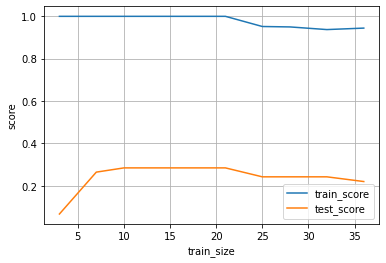

In [205]:
#learning curve
train_size, train_score, test_score = learning_curve(modele, x2_train, y2_train, train_sizes=np.linspace(0.1,1,10), cv=5, random_state=0)
plt.plot(train_size, train_score.mean(axis=1), train_size, test_score.mean(axis=1))
plt.legend(('train_score', 'test_score'))
plt.xlabel('train_size')
plt.ylabel('score')
plt.grid(True)
plt.show()

<h3> Regression linéaire </h3>

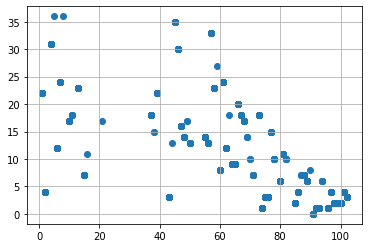

In [272]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
X =  df_fact.iloc[:,0] 
Y =  df_fact.iloc[:,8]
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

linreg2 = LinearRegression() #créer une instance

linreg2.fit(x2_train, y2_train) #entrainer le modèle
y_pred = linreg2.predict(x2_test)
train_size, train_score, test_score = learning_curve(modele, x2_train, y2_train, train_sizes=np.linspace(0.1,1,10), cv=5, random_state=0)

print('test_score = ',linreg2.score(x2_test,y2_test)) 
print('R2 = ',r2_score(y2_test, y_pred))
print('MAE = ',mean_squared_error(y2_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y2_test, y_pred)))
print('MAE = ', mean_absolute_error(y2_test, y_pred))
print('Meadian = ', median_absolute_error(y2_test, y_pred))
p
print('Intercept = ', linreg2.intercept_)
print('Coefficients : ',linreg2.coef_)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


test_score =  -0.4303145297916371
R2 =  -0.4303145297916371
MAE =  8922.24365665534
RMSE =  94.45762889600469
MAE =  54.02343104350808
Meadian =  37.05891713728728
Intercept =  51.71376561429746
Coefficients :  [-0.94314168 -1.17977875  3.77725746]


In [294]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
#slope, intercept

def predict(x):
    return slope * x + intercept
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
fitLine = predict(X)
plt.plot(X, fitLine, c='r')
plt.show()

In [295]:
#predict(5)

<h3> Regression Logistique </h3>

In [216]:
# Définir notre variable dépendante y et nos varaibles indépendantes X
X = df1.iloc[:,:1].values
y = df1.iloc[:,3].values


In [217]:
# Construction du modèle
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(x2_train, y2_train)
# Faire de nouvelles prédictions
y_pred = classifier.predict(x2_test)
classifier.score(x2_test,y2_test)

0.3333333333333333

In [218]:
# Matrice de confusion

cm = confusion_matrix(y2_test, y_pred)
print(cm)

[[7 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]



# Visualiser les résultats
X_set, y_set = x2_train, y2_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Résultats du Training set')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()